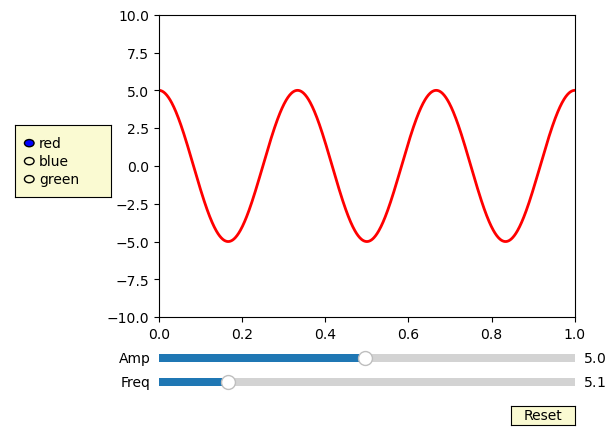

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

# configure subplot
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)

#set initial values of frequency and amplification
a0 = 5
f0 = 3
delta_f = 5.0
s = a0*np.cos(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')

# plot cosine curve
plt.axis([0, 1, -10, 10])

#configure axes
axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

# add slider for Frequency and Amplification
sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

# function to update the graph when frequency or amplification is changed on the slider
def update(val):
	# get current amp value
    amp = samp.val
    # get current freq value
    freq = sfreq.val
    # plot cosine curve with updated values of amp and freq
    l.set_ydata(amp*np.cos(2*np.pi*freq*t))
    # redraw the figure
    fig.canvas.draw_idle()
# update slider frequency
sfreq.on_changed(update)
# update amp frequency
samp.on_changed(update)

# reset slider to original values when reset button is pressed 
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

# reset all variables
def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

# function to change color of graph
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
# change color when radio button is clicked
radio.on_clicked(colorfunc)

plt.show()